# Lektion 13

In [3]:
from sympy import *
init_printing()
from IPython.display import display

## Besselfunktionen

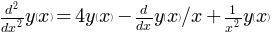

In [4]:
x = Symbol('x')
y = Function('y')
dgl = Eq(y(x).diff(x, 2), -1/x*y(x).diff(x) + 1/x**2*y(x) +4*y(x))
dgl

In [6]:
#dsolve(dgl)   # NotImplementedError

In [28]:
#N = 8
N=18

In [29]:
a = [Symbol('a'+str(j)) for j in range(N)]

In [30]:
n = Symbol('n')

In [31]:
ys = sum([a[j]*x**j for j in range(N)]) 
ys 

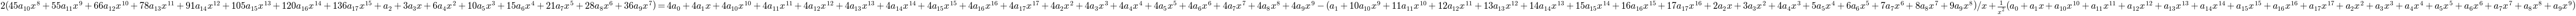

In [32]:
gl = dgl.subs(y(x), ys).doit()
gl

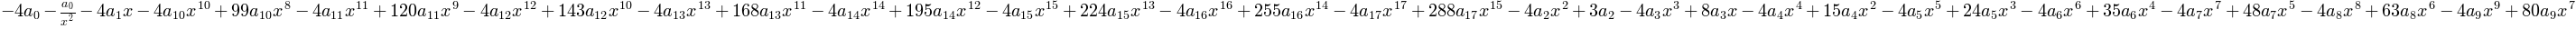

In [33]:
p1 = (gl.lhs - gl.rhs).expand()
p1

In [34]:
p1.coeff(x**(-2))

In [35]:
p1.coeff(x**(-1))

In [36]:
p1.coeff(x, 1)

In [37]:
gls = []
for j in range(N+1):
    glg = Eq(p1.coeff(x, j-2), 0)
    if glg != True:
        gls.append(glg)
gls

In [23]:
#solve(gls) #NotImplementedError

In [38]:
Lsg = solve(gls[:-1])
Lsg

Die ungeraden a werden rückwärts gelöst.  Das ist verwirrend.

In [39]:
var = a.copy()   # böse Falle
del var[1]
var

In [40]:
Lsg = solve(gls[:-1], var)
Lsg

Wir hatten das beim ersten Mal mit $N=8$ gemacht.  Das sind zu wenige Daten.   Jetzt noch Mal mit $N=18$.

Aus Gründen, die ich nicht verstehe, muss man den Kernel zurücksetzen, bevor man mit dem neuen $N$ startet.

In [42]:
#raise Unterbrechung

In [43]:
Lsg[a[1]] = a[1]

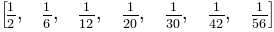

In [44]:
q = [Lsg[a[2*j+3]]/Lsg[a[2*j+1]] for j in range(int(N/2)-2)]
display(q)

In [45]:
liste = []
for j in range(int(N/2-2)):
    m = Lsg[a[2*j+1]]/Lsg[a[2*j+3]]
    liste.append(m/(j+2))
liste

Also
$$ \frac{a_{2j+3}}{a_{2j+1}} = \frac1{(j+1)(j+2)} $$

Das bedeutet
$$ a_{2n+3} = \prod_{j=0}^n \frac1{(j+1)(j+2)} a_1 = \frac{a_1}{(n+1)!(n+2)!}. $$

Probe

In [46]:
for j in range(int(N/2)-2):
    display((Lsg[a[2*j+1]], a[1]/factorial(j)/factorial(j+1)))

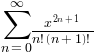

In [47]:
S1 = Sum(x**(2*n+1)/factorial(n)/factorial(n+1), (n,0,oo))
S1

In [48]:
u = S1.doit()
u

In [49]:
srepr(u)

"besseli(Integer(1), Mul(Integer(2), Symbol('x')))"

In [51]:
besseli?

Eine zweite Lösung müsste man erhalten können, indem man einen Ansatz aus einer Potenzreihe und dem Produkt aus dem Logarithmus und einer Potenzreihe macht.

Das Reduktionsverfahren von d'Alembert führt auf ein schwieriges Integral.

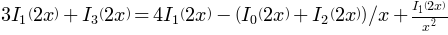

In [52]:
tmp = dgl.subs(y(x), u).doit()
tmp

http://dlmf.nist.gov

$$ I_{\nu-1}(z) - I_{\nu+1}(z) = \frac{2\nu}z I_\nu(z) $$

In [53]:
(tmp.lhs - tmp.rhs).series(x, 0, 20)

## Pattern matching

In [54]:
x = Symbol('x')

In [55]:
x1 = Wild('x1')


In [56]:
pattern = sin(x1)

In [57]:
a = sin(2*x+5)

In [58]:
m = a.match(pattern)
m

In [59]:
b = 2*sin(x1/2)*cos(x1/2)
b

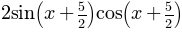

In [60]:
b.subs(m)

In [61]:
def expand_sin_x_halbe(term):
    x1 = Wild('x1')
    pattern = sin(x1)
    ersetzung = 2*sin(x1/2)*cos(x1/2)
    m = term.match(pattern)
    if m:
        return ersetzung.subs(m)
    else:
        return term    

In [62]:
expand_sin_x_halbe(sin(x/2))

In [63]:
series(expand_sin_x_halbe(sin(x)) - sin(x), x, 0, 20)


In [64]:
a = 2*sin(x)
expand_sin_x_halbe(a)

In [65]:
a.is_Mul

True

In [66]:
a.args

In [69]:
def expand_sin_x_halbe(ausdr):
    ausdr = S(ausdr)
    x1 = Wild('x1')
    pattern = sin(x1)
    ersetzung = 2*sin(x1/2)*cos(x1/2)
    m = ausdr.match(pattern)
    if m:
        res = ersetzung.subs(m)
    elif ausdr.is_Mul:
        res = 1
        for term in ausdr.args:
            res = res * expand_sin_x_halbe(term)
    elif ausdr.is_Add:
        res = 0
        for term in ausdr.args:
            res = res + expand_sin_x_halbe(term)
    else:
        res = ausdr
    return res

In [70]:
expand_sin_x_halbe(sin(2*x))

In [71]:
expand_sin_x_halbe(sin(2*x)/2)

In [72]:
expand_sin_x_halbe(1+10*sin((x+1)**2))

In [73]:
ausdr = (1 + sin(x/2))**3

In [74]:
expand_sin_x_halbe(ausdr)

In [75]:
ausdr.is_Pow

True

Mit etwas Fleiß bekommt man ein vollständiges Ersetzungssystem